In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as norm

df = pd.read_csv('../data/clean/datos_limpios.csv')
df = df[df['total']>0]

In [2]:
df.drop(columns='Unnamed: 0', inplace = True)

# Escala Logaritmica

In [4]:
df_log = df.copy()
df_log['total'] = np.log(df_log['total'])
#df_log = df_log[df_log['total'] >= 14]

#df_log.to_csv('../data/clean/datos_limpios_log.csv', index=False)

In [5]:
df_log = df_log[df_log['total'] > 12]

#print(df_log.shape[0])
#print(df_log[df_log['total']< 14].shape[0])

In [6]:
df_log['total'].describe()

count    2297.000000
mean       18.693719
std         2.070498
min        12.206073
25%        17.370859
50%        18.875582
75%        20.101862
max        26.048361
Name: total, dtype: float64

In [7]:
df_log.to_csv('../data/clean/datos_limpios_log.csv', index=False)

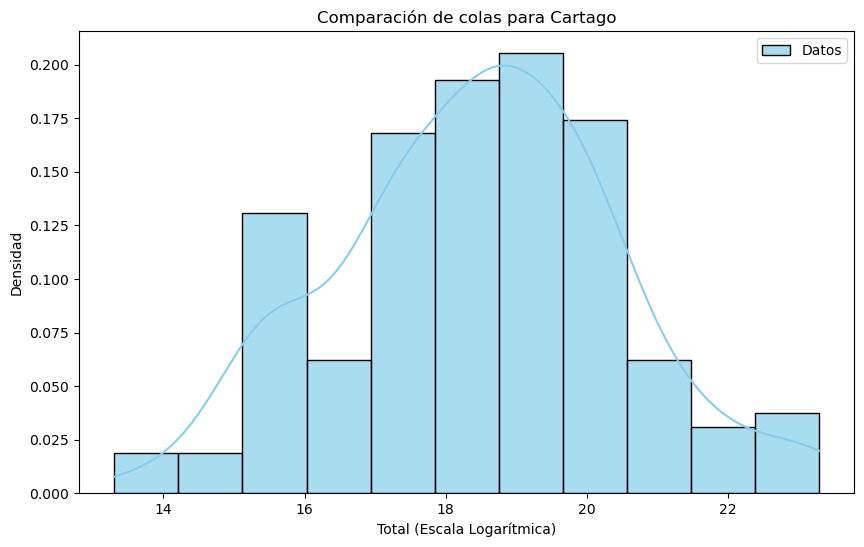

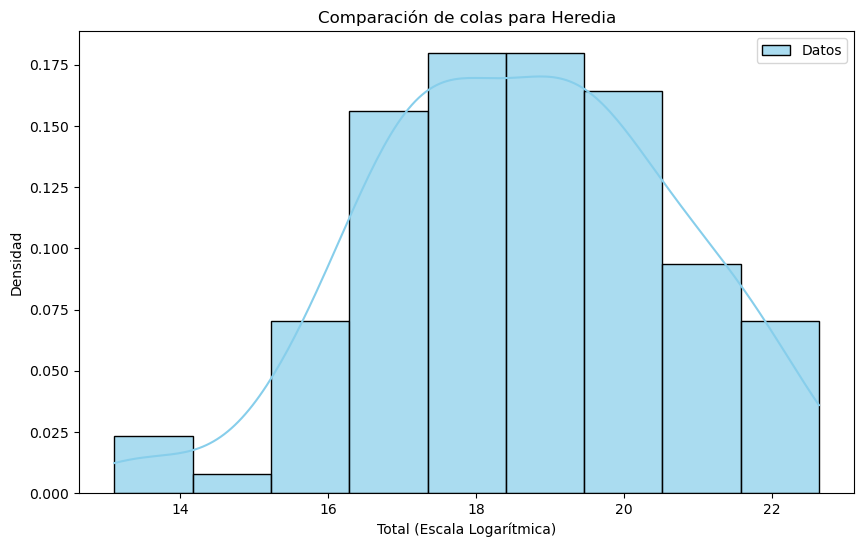

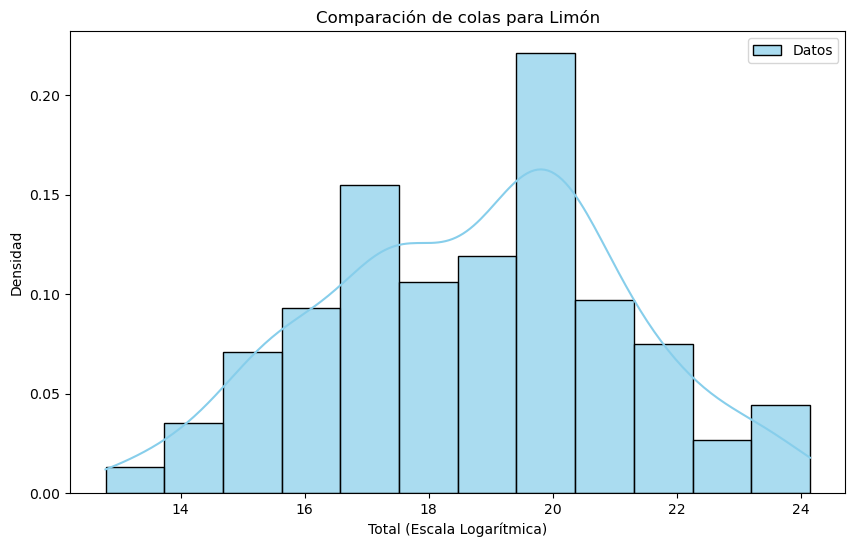

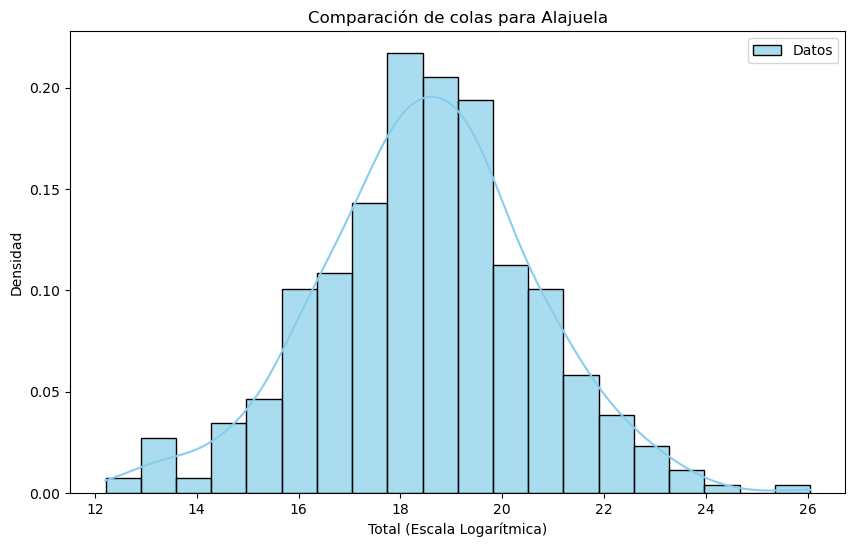

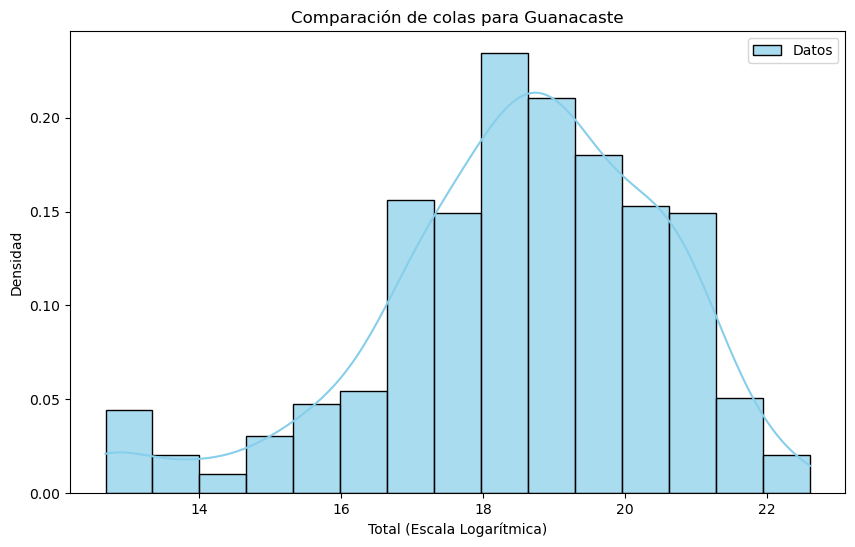

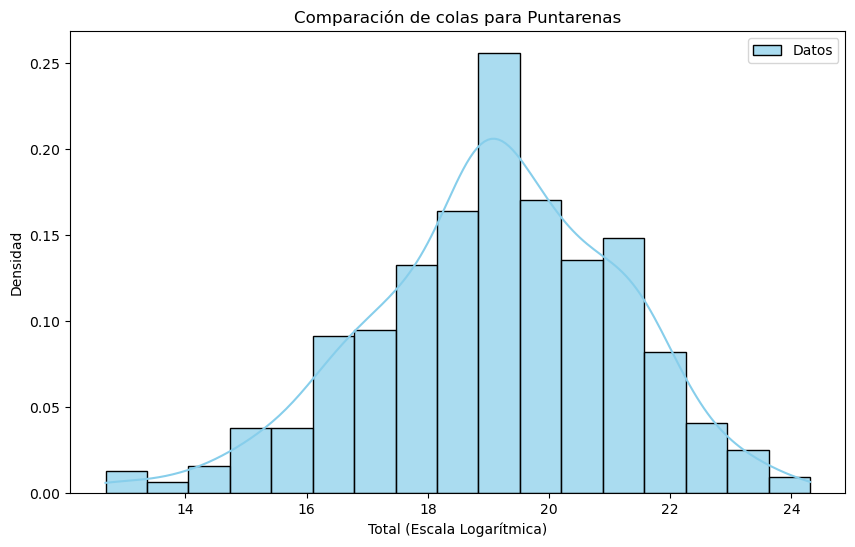

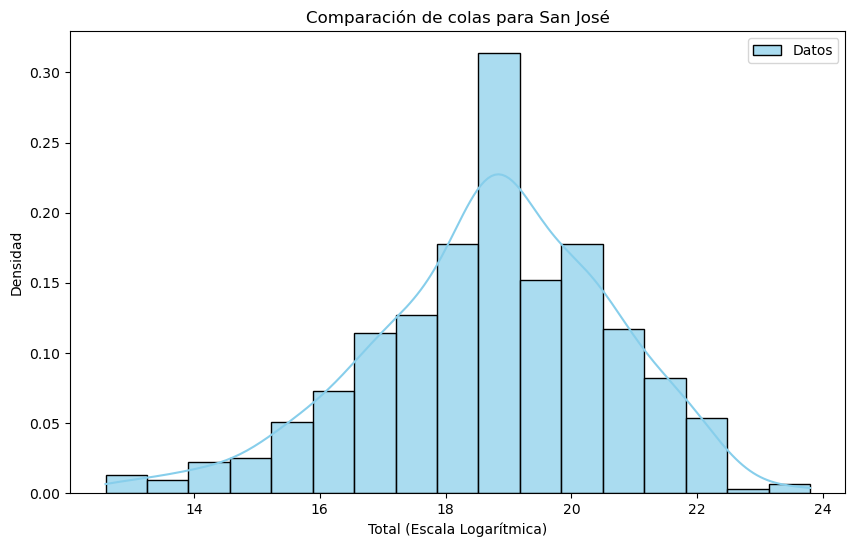

In [7]:
for provincia in df_log['provincia'].unique():
    plt.figure(figsize=(10, 6))
    datos_provincia = df_log[df_log['provincia'] == provincia]['total']
    media = datos_provincia.mean()
    desv = datos_provincia.std()
    sns.histplot(datos_provincia, kde=True, stat='density', alpha=0.7, 
                 label='Datos', color='skyblue')
    x = np.linspace(datos_provincia.min(), datos_provincia.max(), 100)
    #y_normal = norm.pdf(x, media, desv)
    #plt.plot(x, y_normal, 'r-', linewidth=2, 
    #         label=f'N({media:.2f},{desv:.2f}²)')
    umbral_colas = media + 2*desv
    cola_derecha = x > umbral_colas
    cola_izquierda = x < (media - 2*desv)
    #plt.fill_between(x[cola_derecha], 0, y_normal[cola_derecha], 
    #                 alpha=0.3, color='red', label='Colas teóricas')
    #plt.fill_between(x[cola_izquierda], 0, y_normal[cola_izquierda], 
    #                 alpha=0.3, color='red')
    plt.title(f'Comparación de colas para {provincia}')
    plt.xlabel('Total (Escala Logarítmica)')
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()
    plt.close()

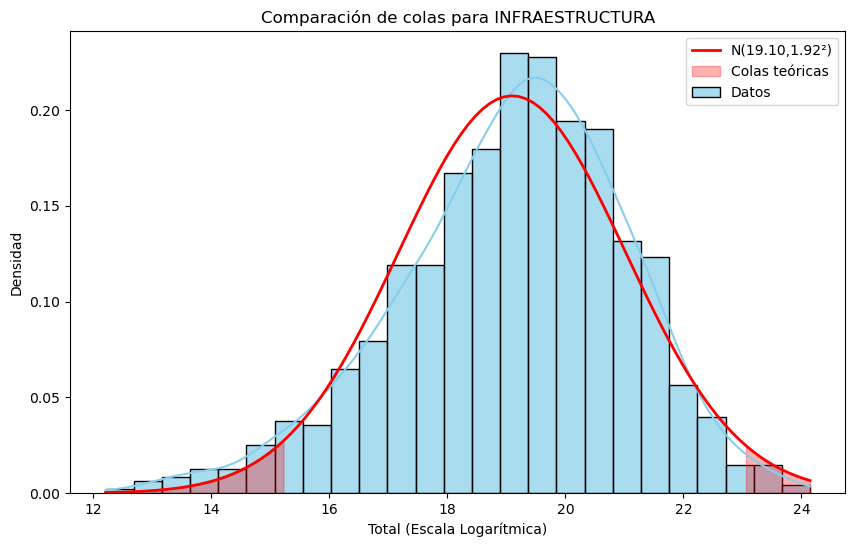

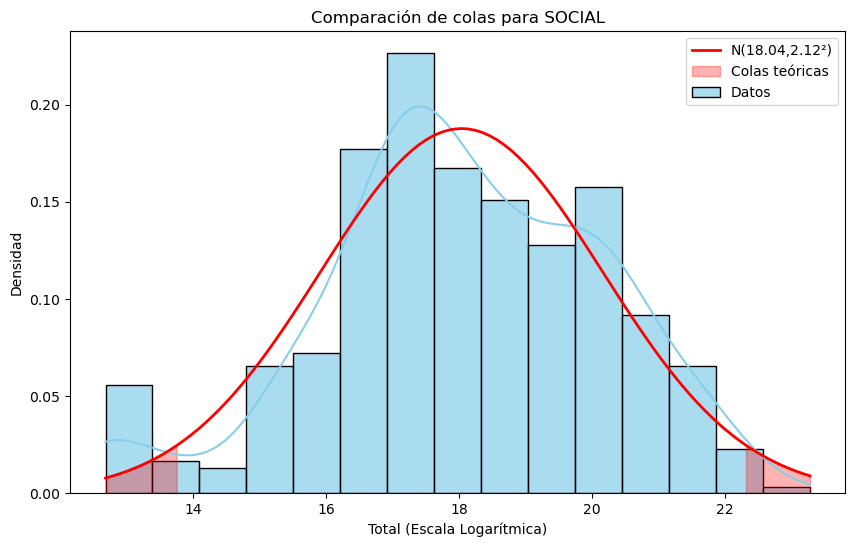

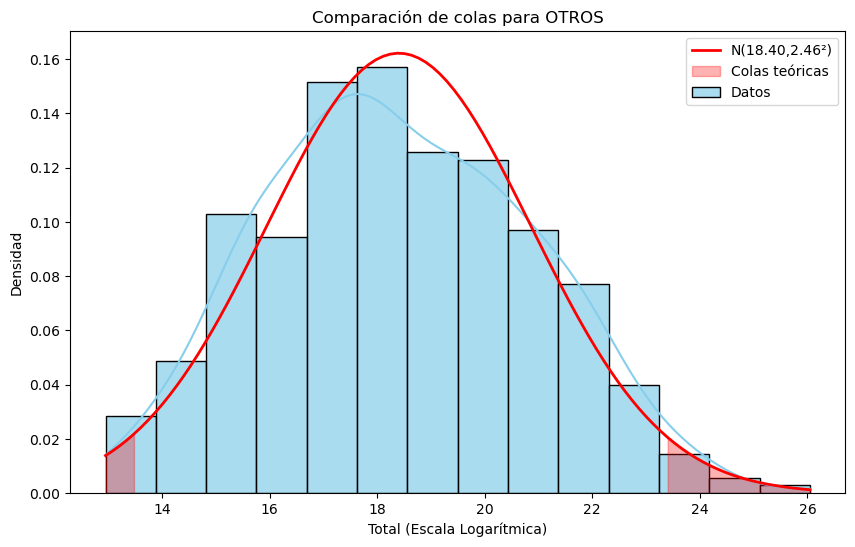

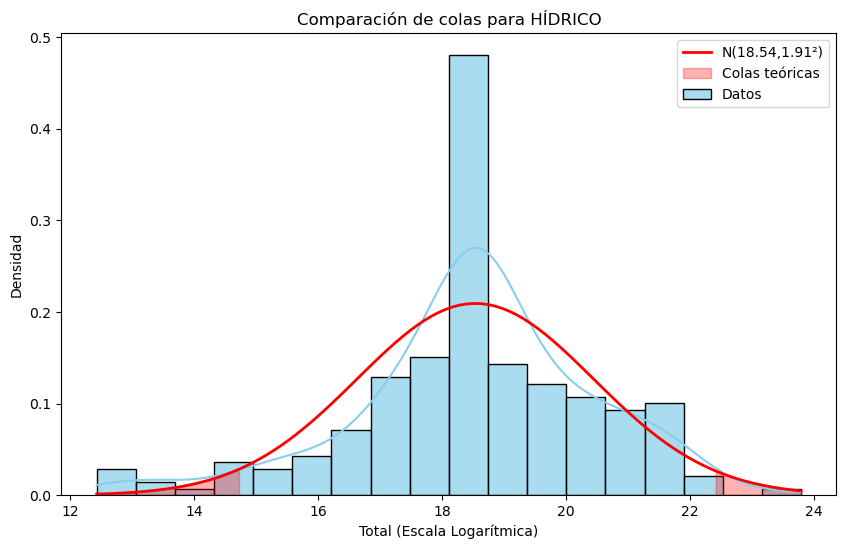

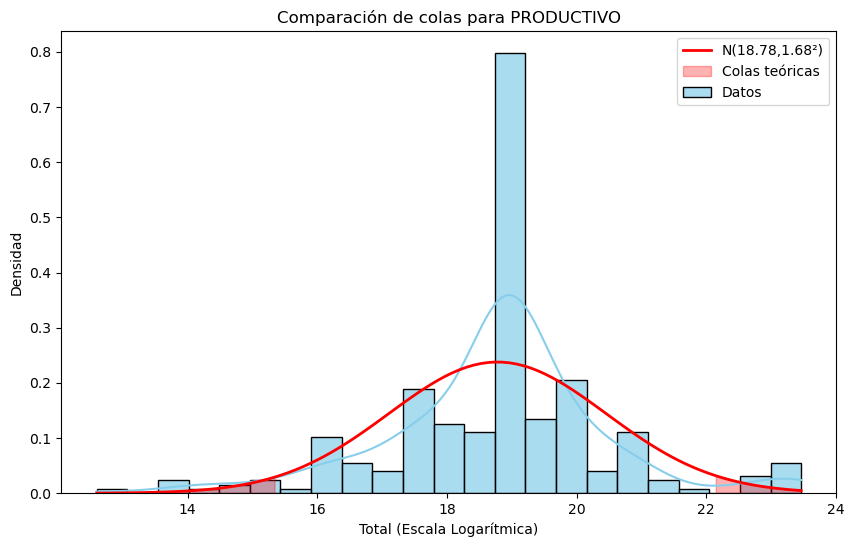

In [132]:
for sector in df_log['sector'].unique():
    plt.figure(figsize=(10, 6))
    datos_sector = df_log[df_log['sector'] == sector]['total']
    media = datos_sector.mean()
    desv = datos_sector.std()
    sns.histplot(datos_sector, kde=True, stat='density', alpha=0.7, 
                 label='Datos', color='skyblue')
    x = np.linspace(datos_sector.min(), datos_sector.max(), 100)
    y_normal = norm.pdf(x, media, desv)
    plt.plot(x, y_normal, 'r-', linewidth=2, 
             label=f'N({media:.2f},{desv:.2f}²)')
    umbral_colas = media + 2*desv
    cola_derecha = x > umbral_colas
    cola_izquierda = x < (media - 2*desv)
    plt.fill_between(x[cola_derecha], 0, y_normal[cola_derecha], 
                     alpha=0.3, color='red', label='Colas teóricas')
    plt.fill_between(x[cola_izquierda], 0, y_normal[cola_izquierda], 
                     alpha=0.3, color='red')
    plt.title(f'Comparación de colas para {sector}')
    plt.xlabel('Total (Escala Logarítmica)')
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()
    plt.close()

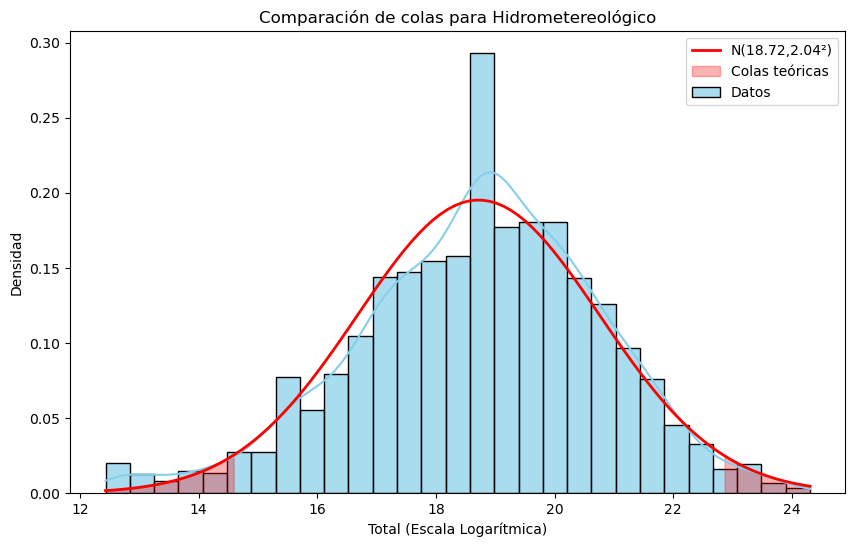

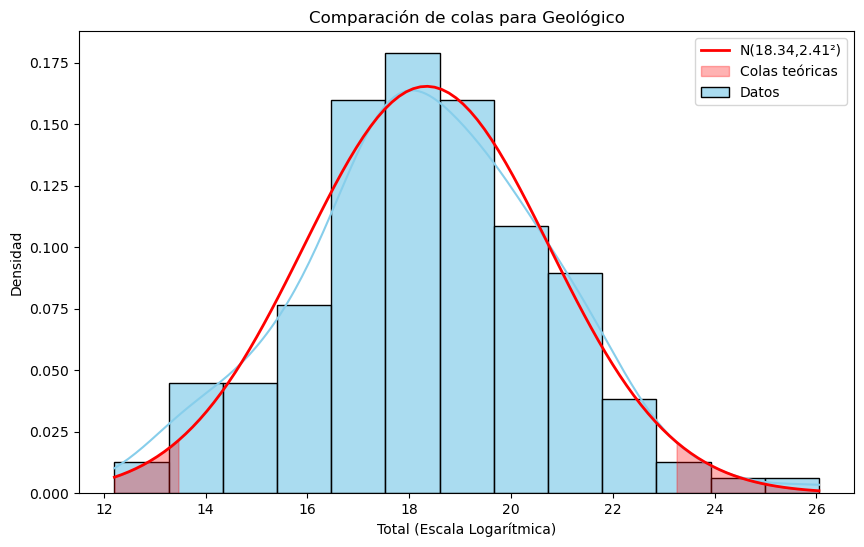

In [133]:
for categoria in df_log['categoria'].unique():
    plt.figure(figsize=(10, 6))
    datos_categoria = df_log[df_log['categoria'] == categoria]['total']
    media = datos_categoria.mean()
    desv = datos_categoria.std()
    sns.histplot(datos_categoria, kde=True, stat='density', alpha=0.7, 
                 label='Datos', color='skyblue')
    x = np.linspace(datos_categoria.min(), datos_categoria.max(), 100)
    y_normal = norm.pdf(x, media, desv)
    plt.plot(x, y_normal, 'r-', linewidth=2, 
             label=f'N({media:.2f},{desv:.2f}²)')
    umbral_colas = media + 2*desv
    cola_derecha = x > umbral_colas
    cola_izquierda = x < (media - 2*desv)
    plt.fill_between(x[cola_derecha], 0, y_normal[cola_derecha], 
                     alpha=0.3, color='red', label='Colas teóricas')
    plt.fill_between(x[cola_izquierda], 0, y_normal[cola_izquierda], 
                     alpha=0.3, color='red')
    plt.title(f'Comparación de colas para {categoria}')
    plt.xlabel('Total (Escala Logarítmica)')
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()
    plt.close()

In [7]:
df_log['canton'].value_counts()

canton
Pérez Zeledón    56
Puntarenas       55
Desamparados     54
Sarapiquí        53
Nicoya           51
                 ..
Cóbano            2
Curridabat        2
Santo Domingo     1
San Isidro        1
Coronado          1
Name: count, Length: 86, dtype: int64

## Generar Data Sets Individuales

In [22]:
data = df_log.copy()

provincias = sorted(df["provincia"].unique())
categorias = sorted(df["categoria"].unique())
sectores   = sorted(df["sector"].unique())

In [23]:
def muestras_por_provincia(df, provincias):

    return {
        p: df.loc[df["provincia"] == p, "total"].dropna().reset_index(drop=True)
        for p in provincias
    }

def muestras_por_sector(df, sectores):

    return {
        s: df.loc[df["sector"] == s, "total"].dropna().reset_index(drop=True)
        for s in sectores
    }


def muestras_por_categoria(df, categorias):

    return {
        c: df.loc[df["categoria"] == c, "total"].dropna().reset_index(drop=True)
        for c in categorias
    }

In [24]:
def muestras_provincia_sector(df, provincias, sectores):

    dic = {}
    for p in provincias:
        for s in sectores:
            serie = df.loc[(df["provincia"] == p) & (df["sector"] == s), "total"]
            if len(serie) > 0:
                dic[(p, s)] = serie.dropna().reset_index(drop=True)
    return dic

def muestras_provincia_categoria(df, provincias, categorias):

    dic = {}
    for p in provincias:
        for c in categorias:
            serie = df.loc[(df["provincia"] == p) & (df["categoria"] == c), "total"]
            if len(serie) > 0:
                dic[(p, c)] = serie.dropna().reset_index(drop=True)
    return dic

def muestras_sector_categoria(df, sectores, categorias):

    dic = {}
    for s in sectores:
        for c in categorias:
            serie = df.loc[(df["sector"] == s) & (df["categoria"] == c), "total"]
            if len(serie) > 0:
                dic[(s, c)] = serie.dropna().reset_index(drop=True)
    return dic

In [25]:
def muestras_prov_cat_sec(df, provincias, categorias, sectores):

    dic = {}
    for p in provincias:
        for c in categorias:
            for s in sectores:
                serie = df.loc[
                    (df["provincia"] == p)
                    & (df["categoria"] == c)
                    & (df["sector"] == s),
                    "total"
                ]
                if len(serie) > 0:
                    dic[(p, c, s)] = serie.dropna().reset_index(drop=True)
    return dic

In [26]:
marg_prov = muestras_por_provincia(df, provincias)
marg_sec  = muestras_por_sector(df, sectores)
marg_cat  = muestras_por_categoria(df, categorias)

marg_prov_sec = muestras_provincia_sector(df, provincias, sectores)
marg_prov_cat = muestras_provincia_categoria(df, provincias, categorias)
marg_sec_cat  = muestras_sector_categoria(df, sectores, categorias)

marg_pcs = muestras_prov_cat_sec(df, provincias, categorias, sectores)